In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score
import itertools

In [2]:
file_path = r"C:\Users\jens.nilsen\OneDrive - Bouvet Norge AS\Documents\GitHub\trfkaipoc\data_2022-2025.csv"
df = pd.read_csv(file_path, sep=";")

In [3]:
df = df[df["EGS.VEDTAK.10670"].notna()]

In [4]:
df['Avslag_ind'] = df['EGS.VEDTAK.10670'].apply(lambda x: 1 if x == "Avslag" else 0)

In [5]:
andel_avslag=df['Avslag_ind'].sum()/df['Avslag_ind'].count()

In [6]:
andel_avslag

0.0405982905982906

In [7]:
antall_avslag=df['Avslag_ind'].sum()

In [8]:
antall_avslag

19

In [9]:
features = [
    'Avslag_ind',
    "ÅDT, total",
    "ÅDT, andel lange kjøretøy",
    "Fartsgrense",
    "Avkjørsel, holdningsklasse",
    "Funksjonsklasse",
    "Avkjørsler",
    "Trafikkulykker",
    "EGS.BRUKSOMRÅDE.1256", 
    "Kurvatur, horisontal", 
    "Kurvatur, stigning"
]

# Encode categorical features
df_encoded = pd.get_dummies(df[features])

In [10]:
df_encoded=df_encoded.dropna()

In [11]:
df_encoded

,Avslag_ind,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning","Avkjørsel, holdningsklasse_Lite streng","Avkjørsel, holdningsklasse_Meget streng",...,EGS.BRUKSOMRÅDE.1256_Dyrkamark/jordbruk,EGS.BRUKSOMRÅDE.1256_Forretning,EGS.BRUKSOMRÅDE.1256_Fritidsaktivitet,EGS.BRUKSOMRÅDE.1256_Gardsbruk,EGS.BRUKSOMRÅDE.1256_Hytte,EGS.BRUKSOMRÅDE.1256_Industri,EGS.BRUKSOMRÅDE.1256_Naust,EGS.BRUKSOMRÅDE.1256_Service,EGS.BRUKSOMRÅDE.1256_Skog/skogbruk,EGS.BRUKSOMRÅDE.1256_Skole/Barnehage
0,0,550.0,11.0,80.0,11,1,-405.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0,293.0,7.0,60.0,8,1,-415.0,-1.0,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,1500.0,13.0,80.0,2,4,182.0,0.7,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,15000.0,6.0,50.0,9,50,99999.0,-0.3,False,False,...,False,True,False,False,False,False,False,False,False,False
4,0,2980.0,12.0,80.0,5,8,99999.0,2.4,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,1,1300.0,6.0,30.0,21,0,-1520.0,-0.5,True,False,...,False,False,False,False,False,False,False,False,False,False
464,0,500.0,10.0,60.0,12,2,-1119.0,0.2,False,False,...,False,False,False,True,False,False,False,False,False,False
465,0,400.0,13.0,60.0,12,0,-192.0,5.5,False,False,...,False,False,False,False,False,False,False,False,False,False
466,0,1600.0,15.0,80.0,8,6,-524.0,-3.0,False,False,...,False,False,False,False,False,False,False,False,True,False


In [12]:
y = df_encoded['Avslag_ind']        # target
X = df_encoded.drop(columns=['Avslag_ind'])  # all other columns

In [23]:
X

,"ÅDT, total","ÅDT, andel lange kjøretøy",Fartsgrense,Avkjørsler,Trafikkulykker,"Kurvatur, horisontal","Kurvatur, stigning","Avkjørsel, holdningsklasse_Lite streng","Avkjørsel, holdningsklasse_Meget streng","Avkjørsel, holdningsklasse_Mindre streng",...,Fartsgrense_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte,"ÅDT, andel lange kjøretøy_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte",Avkjørsler_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte,"Avkjørsel, holdningsklasse_Streng_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte","Kurvatur, horisontal_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte","ÅDT, total_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte","Kurvatur, stigning_x_Funksjonsklasse_C - Lokale hovedveger_x_EGS.BRUKSOMRÅDE.1256_Hytte","ÅDT, andel lange kjøretøy_x_Avkjørsler_x_EGS.BRUKSOMRÅDE.1256_Skog/skogbruk",Fartsgrense_x_Avkjørsler_x_EGS.BRUKSOMRÅDE.1256_Skog/skogbruk,"Trafikkulykker_x_Kurvatur, horisontal_x_EGS.BRUKSOMRÅDE.1256_Hytte"
0,-0.313182,-0.080359,1.054367,0.140418,-0.299279,-0.814782,-0.256956,1.077561,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
1,-0.465837,-0.775024,-0.317363,-0.373196,-0.299279,-0.814987,-0.393044,1.077561,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
2,0.251105,0.266974,1.054367,-1.400425,0.270142,-0.802780,0.069656,-0.928022,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
3,8.269930,-0.948690,-1.003228,-0.201992,9.001252,1.238144,-0.202521,-0.928022,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
4,1.130206,0.093308,1.054367,-0.886811,1.029369,1.238144,0.532356,-0.928022,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,0.132308,-0.948690,-2.374957,1.852466,-0.489085,-0.837580,-0.256956,1.077561,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
452,-0.342882,-0.254025,-0.317363,0.311623,-0.109472,-0.829381,-0.066433,-0.928022,-0.105292,1.828348,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
453,-0.402280,0.266974,-0.317363,0.311623,-0.489085,-0.810427,1.376103,-0.928022,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,-0.170038,-0.190972,-0.06159
454,0.310504,0.614307,1.054367,-0.373196,0.649755,-0.817215,-0.937397,-0.928022,-0.105292,-0.546942,...,-0.046881,-0.046881,-0.046881,-0.046881,0.046881,-0.046881,-0.046881,5.496499,5.519403,-0.06159


In [ ]:
import itertools
import pandas as pd
import numpy as np

interactions_3way = {}

df_num = X.copy()

# Use only columns that exist and have variance
valid_cols = [c for c in X.columns if c in df_num.columns and df_num[c].std() > 0]

# Create 3-way interactions
for f1, f2, f3 in itertools.combinations(valid_cols, 3):
    col_name = f"{f1}_x_{f2}_x_{f3}"
    # Compute product safely
    df_num.loc[:, col_name] = df_num[f1] * df_num[f2] * df_num[f3]
    corr_val = df_num[col_name].corr(y)
    if not np.isnan(corr_val):  # skip NaNs
        interactions_3way[col_name] = corr_val

# Sort by absolute correlation
interactions_3way_sorted = dict(
    sorted(interactions_3way.items(), key=lambda item: abs(item[1]), reverse=True)
)

print("Top 10 three-way interactions by correlation with Avslag_ind:")
for k, v in list(interactions_3way_sorted.items())[:10]:
    print(f"{k}: {v:.4f}")

# Take the top features (only if any exist)
top_features = list(interactions_3way_sorted.keys())[:25]
if top_features:
    X = pd.concat([X, df_num[top_features]], axis=1)
    print(f"\n✅ Added {len(top_features)} three-way interaction features to X.")
    print("New shape of X:", X.shape)

    print("\n📊 Names of added features:")
    for name in top_features:
        print(f" • {name}")
else:
    print("\n⚠️ No valid three-way interactions found (all correlations were NaN or zero).")


C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_4564\1110715206.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num.loc[:, col_name] = df_num[f1] * df_num[f2] * df_num[f3]
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_4564\1110715206.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_num.loc[:, col_name] = df_num[f1] * df_num[f2] * df_num[f3]
C:\Users\jens.nilsen\AppData\Local\Temp\ipykernel_4564\1110715206.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

In [14]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [16]:
# Fit logistic regression
model = LogisticRegression(max_iter=100000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=100000)

In [17]:
yps=model.predict_proba(X_test)

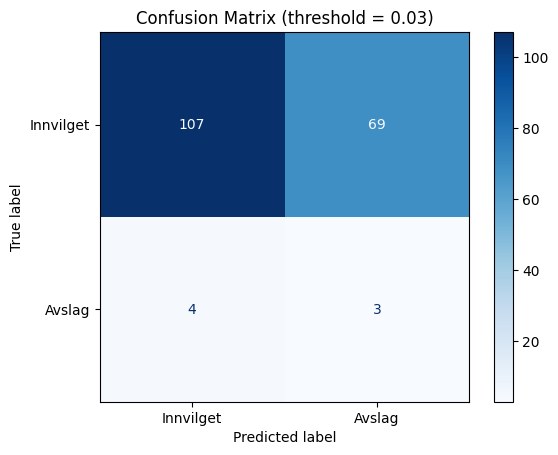

In [18]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.03  # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

In [19]:
# Detailed metrics per class
print("Classification Report Logistic regression:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report Logistic regression:
              precision    recall  f1-score   support

           0     0.9640    0.6080    0.7456       176
           1     0.0417    0.4286    0.0759         7

    accuracy                         0.6011       183
   macro avg     0.5028    0.5183    0.4108       183
weighted avg     0.9287    0.6011    0.7200       183



In [20]:
model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000)

In [21]:
yps=model.predict_proba(X)

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicted probabilities for class "1"
y_prob = yps[:, 1]

# Adjustable threshold
threshold = 0.03 # 👈 change this value between 0 and 1

# Convert probabilities to class predictions
y_pred = (y_prob >= threshold).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Innvilget", "Avslag"])

# Plot
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (threshold = {threshold})")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [183, 456]

In [ ]:
# Detailed metrics per class
print("Classification Report Random Forrest:")
print(classification_report(y_test, y_pred, digits=4))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 4 features
top_features = importances_sorted.index[:3]

# Subset data
X_top = X[top_features].copy()
X_top['target'] = y  # add the target

# Pairwise scatter plots
sns.pairplot(
    X_top,
    vars=top_features,
    hue='target',            # color by target
    palette={0: "blue", 1: "red"}, 
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pairwise Plots of Top Features", y=1.02)
plt.show()